In [1]:
import numpy as np
import pylab
import pandas as pd
from scipy.stats import linregress
from matplotlib.colors import LogNorm
from numpy import polyfit
from scipy.optimize import brenth
from scipy.interpolate import interp1d,UnivariateSpline
%matplotlib inline

## Main figure panel d, e, f

In [64]:
def PlotPhaseDiagram(length, csize, p):
    df = pd.read_csv('PhaseDiagSizeDistriL'+str(length)+'.txt', sep='\t', header=None)
    df.columns = ['NSIM', 'NSUMO', 'LSIM', 'LSUMO', 'beta', 'gamma', 'step', 'Sizes']

    df.reset_index(inplace=True)
    ratio_in_cluster = []
    for idx in range(len(df)):
        distri = df.loc[idx].Sizes
        sizes = distri.split('[')[1].split(']')[0].split(' ')
        sizes = filter(None, sizes)
        sizes = pylab.array([int(ele) for ele in sizes])
        ratio_in_cluster.append(sum(sizes[sizes>csize])/float(sum(sizes)))

    df['RatioInCluster'] = ratio_in_cluster

    meanval = df.groupby(['NSIM', 'beta'])['RatioInCluster'].mean()
    meandata = pd.DataFrame(meanval.to_frame().to_records())
    cnt = df.groupby(['NSIM', 'beta'])['RatioInCluster'].count()
    cntdata = df.groupby(['NSIM', 'beta'])['RatioInCluster'].count()

    ddf = meanval.to_frame()
    ddc = cntdata.to_frame()
    ddf['Count'] = ddc.RatioInCluster.values

    ddf = ddf[ddf.Count>2]

    ###
    ddf.reset_index(inplace=True)
    k = ddf.groupby(['NSIM', 'beta']).mean().unstack()
    kk = k.RatioInCluster.values# - k.RatioInCluster_y.values
    ###

    fig, ax = pylab.subplots()
    kk = kk.transpose()
    ff = ax.imshow(kk, interpolation='none', vmin=0, vmax=1, extent=[min(df.NSUMO)*8/2500.0, max(df.NSUMO)*8/2500.0, 11,0], cmap='Blues')
    ax.set_aspect(150/2500.0)
    #pylab.xlabel('Rubisco concentration')
    #pylab.ylabel('Specific Bond Energy (kT)')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pylab.rc('xtick', labelsize=0.0)
    pylab.rc('ytick', labelsize=0.0)
    if p == 1:
        cbar = fig.colorbar(ff, ticks = [0, 0.2, 0.4, 0.6, 0.8, 1])
        pylab.savefig('/Users/binxu/Desktop/Rubisco_plots/PercentageOfRubiscosInClusterSizeColorbar.png', dpi=500)
    else:
        pylab.savefig('/Users/binxu/Desktop/Rubisco_plots/L'+str(length)+'PercentageOfRubiscosInClusterSize'+str(csize)+'.png', dpi=500)

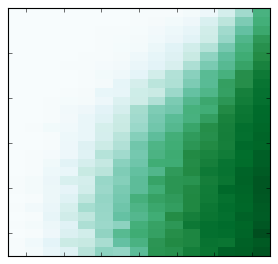

In [63]:
length = 3
csize = 10
p = 0
PlotPhaseDiagram(length, csize, p)

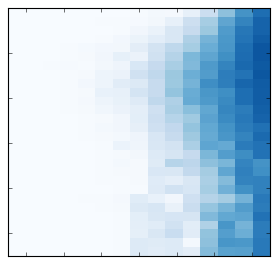

In [58]:
length = 4
csize = 10
p = 0
PlotPhaseDiagram(length, csize, p)

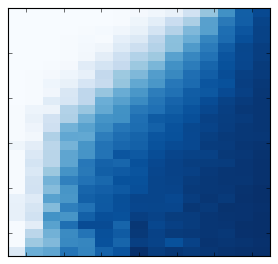

In [59]:
length = 5
csize = 10
p = 0
PlotPhaseDiagram(length, csize, p)

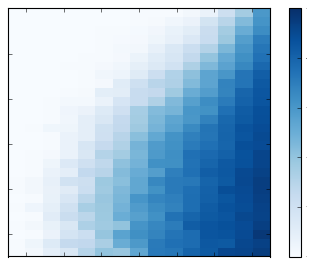

In [60]:
length = 3
csize = 10
p = 1
PlotPhaseDiagram(length, csize, p)

## Main figure panel j, k. Extended figure panel i

In [2]:
df = pd.read_csv('AllSizeDistri.txt', sep='\t', header=None)
df.columns = ['NSIM', 'NSUMO', 'LSIM', 'LSUMO', 'beta', 'gamma', 'step', 'Sizes']
csize = 10

ratio_in_cluster = []
for idx in range(len(df)):
    distri = df.loc[idx].Sizes
    sizes = distri.split('[')[1].split(']')[0].split(' ')
    sizes = filter(None, sizes)
    sizes = pylab.array([int(ele) for ele in sizes])
    ratio_in_cluster.append(sum(sizes[sizes>csize])/float(sum(sizes)))

df['RatioInCluster'] = ratio_in_cluster
df = df[df.beta==10]

In [3]:
def get_proba(df):
    meanval = df.groupby(['NSIM', 'beta'])['RatioInCluster'].mean()
    meandata = pd.DataFrame(meanval.to_frame().to_records())
    ddf = meanval.to_frame()
    ddf.reset_index(inplace=True)
    k = ddf.groupby(['NSIM', 'beta']).mean().unstack()
    kk = k.RatioInCluster.values
    return k

In [4]:
def prep_plot(LSIM, k):
    x = get_proba(df[df.LSIM==LSIM]).reset_index().NSIM.values*LSIM/2500.0
    y = get_proba(df[df.LSIM==LSIM]).reset_index().RatioInCluster.values.transpose()[0]
    ff = UnivariateSpline(x[k:], y[k:], k=4)

    xfit = pylab.arange(0.01, 0.76, 0.01)
    yfit = ff(xfit)

    try:
        x0 = max([xx for xx, yy in zip(xfit, yfit) if yy <= 0])+0.01
    except:
        x0 = [xx for xx, yy in zip(xfit, yfit) if yy == min(yfit)][-1]
    y0 = ff(x0)
    ids = [idd for idd, val in enumerate(xfit) if val < x0]
    try:
        idk = max(ids)
    except:
        idk = 0
    return x, y, xfit[idk:], yfit[idk:], x0, y0

### panel j

[None, None, None, None]

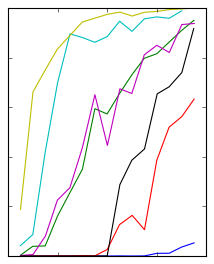

In [6]:
fig = pylab.figure()
ax = fig.add_subplot(111)
for LL in [2,3,4,5,6,7,8]:
    x, y, _, _, _, _ = prep_plot(LL, 0)
    ax.plot(x, y, label='L='+str(LL))
pylab.ylim([0, 1])
pylab.xlim([0, 0.8])
ax.set_aspect(1)
pylab.rc('xtick', labelsize=0)
pylab.rc('ytick', labelsize=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
pylab.xticks([0, 0.2, 0.4, 0.6, 0.8])
[i.set_linewidth(1) for i in ax.spines.itervalues()]
#pylab.savefig('/Users/binxu/Desktop/Rubisco_plots/Fig-4.7-fraction_conenctration_different_lengths.png', dpi=500)
#pylab.legend()
#ax.set_xlabel('Rubisco concentration', fontsize=20)
#ax.set_ylabel('Fraction of Rubiscos in clusters of 10+', fontsize=20)

### extended panel i

[None, None, None, None]

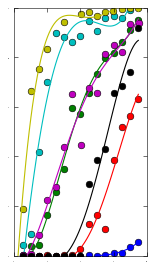

In [7]:
fig = pylab.figure()
ax = fig.add_subplot(111)
fitstart = {2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
Llist = [2,3,4,5,6,7,8]
thres = []
colors = {2:'b', 3:'g', 4:'r', 5:'c', 6:'m', 7:'y', 8:'k'}
for LL in Llist:
    x, y, xfit, yfit, x0, y0 = prep_plot(LL, fitstart[LL])
    ax.plot(x, y, colors[LL]+'o', linewidth=0, label='L='+str(LL))
    ax.plot(xfit, yfit, colors[LL])
    thres.append(x0)
pylab.ylim([0, 1])
pylab.xlim([0, 0.8])
ax.set_aspect(1.5)
pylab.rc('xtick', labelsize=0)
pylab.rc('ytick', labelsize=0)
pylab.xticks([0, 0.2, 0.4, 0.6, 0.8])
[i.set_linewidth(0.5) for i in ax.spines.itervalues()]
#pylab.savefig('/Users/binxu/Desktop/Rubisco_plots/Fig-SXX-Determination-onset.pdf')
#pylab.legend()
#ax.set_xlabel('Rubisco concentration', fontsize=20)
#ax.set_ylabel('Fraction of Rubiscos in clusters of 10+', fontsize=20)

### panel k

[]

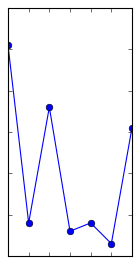

In [8]:
fig = pylab.figure()
ax = fig.add_subplot(111)
pylab.plot(Llist, thres, '-o')
ax.set_aspect(20)
[i.set_linewidth(1) for i in ax.spines.itervalues()]
pylab.rc('xtick', labelsize=0)
pylab.rc('ytick', labelsize=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
#pylab.savefig('/Users/binxu/Desktop/Rubisco_plots/Fig-4.9-ClusteringOnset.png', dpi=500)

### panel l

In [11]:
picks = {2:188, 3:125, 4:94, 5:75, 6:63, 7:54, 8:47} # 15 percent

/Users/binxu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[None, None, None, None]

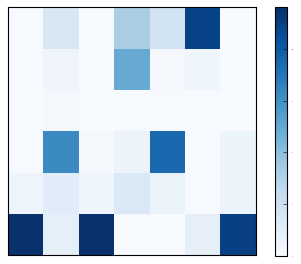

In [12]:
binedges = range(1,200)
themat = pylab.zeros((7, len(binedges)-1))
for idxL, ll in enumerate(range(2,9)):
    dfsmall = df[df.LSIM==ll][df.NSIM == picks[ll]]
    dfsmall.reset_index()
    alllist = []
    for idx in range(len(dfsmall)):
        distri = dfsmall.iloc[idx].Sizes
        sizes = distri.split('[')[1].split(']')[0].split(' ')
        sizes = filter(None, sizes)
        sizes = [int(ele) for ele in sizes]
        alllist+=sizes
    histo, _ = pylab.histogram(alllist, density=True, bins=binedges)
    themat[idxL, :] = histo

thereducedmat = themat[:,0:6]
for i in range(6):
    thereducedmat[i, 5] = sum(themat[i, 5:])
fig, ax = pylab.subplots()
ff = ax.imshow(pylab.flipud(thereducedmat.transpose()),
               cmap='Blues',
               interpolation='none',
               extent=[2,8,0,6])
pylab.xticks([])
pylab.yticks([])
ax.set_aspect(1)
pylab.colorbar(ff, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
[i.set_linewidth(1) for i in ax.spines.itervalues()]
#pylab.savefig('/Users/binxu/Desktop/Rubisco_plots/Fig-4.8-DistributionVsLength15pct.png', dpi=500)

## Extended panel k

In [3]:
def n_in_cluster(distri, c, cluster_size):
    distribution = np.array([int(ele.split(',')[1]) for ele in distri[1:-2].split(') (')])
    filtered = [ele if ele >= cluster_size else 0 for ele in distribution]
    return sum(filtered)/float(sum(distribution))

In [3]:
def ensemble_in_cluster(r, c, repeat):
    df = pd.read_table(open('OffLatticeResult/density/result'+str(repeat)+'/run'+str(r)+'_L'+str(c)+'.txt', 'r'), header=None)

    in_cluster = [n_in_cluster(df.iloc[idx,1], c, 10) for idx in range(len(df))]
    df['in_cluster'] = in_cluster

    return np.mean(df.in_cluster), np.std(df.in_cluster)

In [5]:
mean_in3 = [[ensemble_in_cluster(r, 3, repeat) for r in [1,2,3,4,5,6,7,8,9]] for repeat in [1,2,3]]
mean_in4 = [[ensemble_in_cluster(r, 4, repeat) for r in [1,2,3,4,5,6,7,8,9]] for repeat in [1,2,3]]
mean_in5 = [[ensemble_in_cluster(r, 5, repeat) for r in [1,2,3,4,5,6,7,8,9]] for repeat in [1,2,3]]

In [6]:
mono = [(20*m*4/3*np.pi*5**3)/120**3 for m in [1,2,3,4,5,6,7,8,9]]

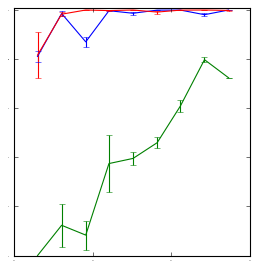

In [13]:
fig = pylab.figure()
ax = fig.add_subplot(111)
pylab.errorbar(mono, [(y1[0]+y2[0])/2. for y1,y2 in zip(mean_in3[0], mean_in3[1])], [abs(y1[0]-y2[0])/2./np.sqrt(2) for y1,y2 in zip(mean_in3[0], mean_in3[1])], label='L=3')
pylab.errorbar(mono, [(y1[0]+y2[0])/2. for y1,y2 in zip(mean_in4[0], mean_in4[1])], [abs(y1[0]-y2[0])/2./np.sqrt(2) for y1,y2 in zip(mean_in4[0], mean_in4[1])], label='L=4')
pylab.errorbar(mono, [(y1[0]+y2[0])/2. for y1,y2 in zip(mean_in5[0], mean_in5[1])], [abs(y1[0]-y2[0])/2./np.sqrt(2) for y1,y2 in zip(mean_in5[0], mean_in5[1])], label='L=5')
pylab.ylim([0,1.01])
pylab.rc('xtick', labelsize=0)
pylab.rc('ytick', labelsize=0)
pylab.xticks([0, 0.02, 0.04, 0.06])
ax.set_aspect(0.5/8)
#pylab.savefig('/Users/binxu/Desktop/Rubisco_plots/avg_cluster.pdf')

## Extended Table

In [6]:
result = {}
for L in ['3','4','5']:
    for r in ['1.6', '2.0', '2.5']:
        for u in ['0.05', '0.1', '0.2']:
            for k in ['0.12', '0.24', '0.48']:
                for repeat in [1,2,3]:
                    df = pd.read_table(open('OffLatticeResult/robustness/result'+str(repeat)+'/run_'+r+'_'+u+'_'+k+'_L'+L+'.txt', 'r'), header=None)
                    nrubi_in = [n_in_cluster(df.iloc[idx,1], int(L), 10) for idx in range(len(df))]
                    result[(L,r,u,k,repeat)] = np.mean(nrubi_in)

In [29]:
pd.set_option('display.max_rows', 500)
df = pd.DataFrame.from_dict(result, orient='index').reset_index()
df[['L', 'r', 'u', 'k', 'repeat']] = df['index'].apply(pd.Series)
df['value'] = df[0]
df=df[['L', 'r', 'u', 'k', 'repeat', 'value']]
df.set_index(['r', 'u', 'k','L', 'repeat']).unstack(['L']).sortlevel(0, axis=1)

value                    
L                            3         4         5
r   u    k    repeat                              
1.6 0.05 0.12 1       0.879950  0.000000  0.948813
              2       0.983407  0.000000  0.962105
              3       0.911096  0.000000  0.943691
         0.24 1       0.760522  0.000000  0.994614
              2       0.985070  0.333307  0.912228
              3       0.994720  0.249987  0.874920
         0.48 1       1.000000  0.999993  0.987500
              2       0.999952  0.999510  1.000000
              3       0.994542  0.999967  1.000000
    0.1  0.12 1       0.994646  0.000000  0.843849
              2       0.867219  0.000000  0.938252
              3       0.994520  0.000000  0.948793
         0.24 1       0.978893  0.470319  0.971308
              2       0.999693  0.183727  0.945703
              3       0.999619  0.300000  0.821351
         0.48 1       0.995223  0.884060  0.998110
              2       0.999970  0.999733  0.999895
              3       0.999830  0.999310  1.000000
    0.2  0.12 1       0.984044  0.000000  0.927932
              2       0.883027  0.000000  0.930554
              3       0.791723  0.000000  0.926710
         0.24 1       0.999811  0.200000  0.938590
              2       0.981270  0.216667  0.969386
              3       0.981552  0.183333  0.973153
         0.48 1       0.999967  1.000000  1.000000
              2       0.999981  0.983297  0.999938
              3       1.000000  0.999767  1.000000
2.0 0.05 0.12 1       0.999430  0.000000  0.965674
              2       0.944200  0.000000  0.896076
              3       0.855488  0.000000  0.898618
         0.24 1       0.999411  0.000000  0.972203
              2       0.999274  0.280771  0.962245
              3       0.981363  0.000000  0.964595
         0.48 1       0.999811  0.899997  1.000000
              2       0.999985  0.904626  0.999665
              3       0.999944  0.956045  1.000000
    0.1  0.12 1       0.999722  0.000000  0.929052
              2       0.919509  0.000000  0.959366
              3       0.996701  0.000000  0.938177
         0.24 1       0.999500  0.283203  0.949998
              2       0.989617  0.049923  0.999913
              3       0.999789  0.199990  0.948975
         0.48 1       0.999963  0.804346  1.000000
              2       0.999989  0.966647  0.999903
              3       0.999693  0.949990  0.999998
    0.2  0.12 1       0.996619  0.000000  0.949960
              2       0.905730  0.000000  0.937148
              3       0.979356  0.000000  0.936250
         0.24 1       0.985307  0.396981  0.872813
              2       0.998582  0.266667  0.987200
              3       0.999819  0.333033  0.979109
         0.48 1       0.999996  0.949840  0.994174
              2       0.992005  0.955396  0.999995
              3       0.999826  0.927111  0.999935
2.5 0.05 0.12 1       0.990339  0.000000  0.891097
              2       0.981404  0.000000  0.856179
              3       0.975157  0.000000  0.974870
         0.24 1       0.981389  0.000000  0.974483
              2       0.833141  0.000000  0.899998
              3       0.979674  0.000000  0.887493
         0.48 1       0.911388  0.779361  0.999890
              2       0.999974  0.899873  0.987500
              3       0.999989  0.831950  0.999860
    0.1  0.12 1       0.999922  0.000000  0.962300
              2       0.971735  0.000000  0.981201
              3       0.938086  0.000000  0.868046
         0.24 1       0.888574  0.000000  0.961765
              2       0.994386  0.000000  0.837435
              3       0.999956  0.000000  0.849783
         0.48 1       0.906548  0.915370  0.887398
              2       1.000000  0.933287  0.999950
              3       0.999993  0.883273  0.999925
    0.2  0.12 1       0.929344  0.000000  0.986935
              2       0.986925  0.000000  0.973705
              3       0.963659  0.000000  0.974103
         0.24 1       0.999774  0.139212  0.974

In [43]:
pd.options.display.float_format = '{:,.2f}'.format
newdf = df.drop('repeat', axis=1).groupby(['r', 'u', 'k', 'L']).mean().reset_index()
newdf['std'] = df.drop('repeat', axis=1).groupby(['r', 'u', 'k', 'L']).std().reset_index()['value']
newdf['result'] = ['{:,.2f} +/- {:,.2f}'.format(v,s) for v, s in zip(newdf['value'].values, newdf['std'].values)]
outputdf=newdf.set_index(['r', 'u', 'k','L']).unstack(['L']).sortlevel(0, axis=1)['result']

In [44]:
outputdf.to_csv('Robustness.csv')